In [6]:
import math
import tempfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy.stats import norm
from tensorflow.keras.datasets import mnist
from VAEs.SimpleVAE import SimpleVAE
from VAEs.SimpleVAE.losses import CustomLossFunction

In [5]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_train = np.expand_dims(x_train, -1)
x_test = x_test.astype("float32") / 255.
x_test = np.expand_dims(x_test, -1)

In [3]:
image_shape = (28, 28, 1)
shape_before_flattening = (14, 14, 1)
batch_size = 16
latent_dim = 2

In [4]:
class CustomMetricsFunction(tf.metrics.BinaryAccuracy):
    def __call__(self, y_true, y_pred):
        y_pred = y_pred[0]
        return super().__call__(y_true, y_pred)

In [5]:
model = VAE(shape_before_flattening, latent_dim)

In [6]:
try:
    model.load_weights("./autosave/autosave_model")
    print("Loaded newest checkpoint.")
except:
    print("There is no checkpoint to load.")

Loaded newest checkpoint.


In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001), 
              loss=CustomLossFunction(), 
              metrics=CustomMetricsFunction())

In [ ]:
history = model.fit(x=x_train, y=x_train, batch_size=16, epochs=10, verbose=100, initial_epoch=65)

In [8]:
model.evaluate(x=x_test, y=x_test)

(0.17211792, 0.7992489)

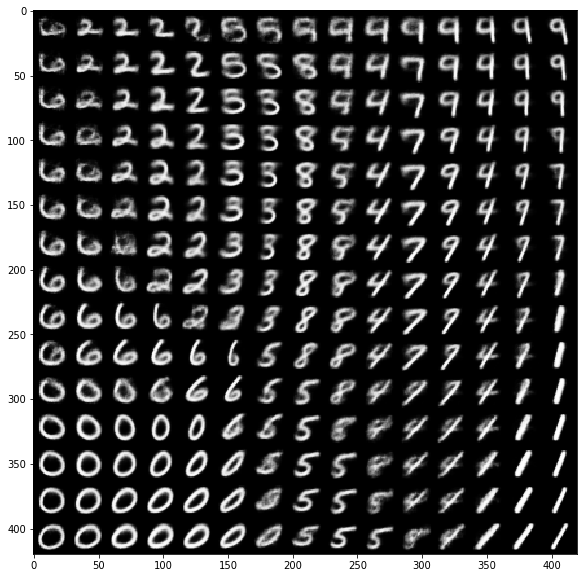

In [10]:
n = 15
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = model.decoder(z_sample).numpy()
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap="Greys_r")
plt.show()